In [2]:
pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)
ERROR: No matching distribution found for tensorflow
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 22.1 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.6 MB/s eta 0:00:00m eta 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for JPype1: filename=JPype1-1.4.0-cp38-cp38-macosx_11_0_arm64.whl size=371930 sha256=feae6b469a731846b46cc33261195dee1acf4be901e95fcb87a18f160fad67cb
  Stored in directory: /Users/krc/Library/Caches/pip/wheels/9e/e1/26/00a64d833a6c69720288a0b0851e16f87e741ad8fb213f0b3a
Successfully built JPype1
Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import urllib.request
import pickle
from konlpy.tag import Okt
from tqdm import tqdm
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [11]:
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [12]:
okt = Okt()

In [13]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '로']

In [14]:
def stock_up_down_predict(new_sentence):
  print("입력받음:", new_sentence)
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]', "", new_sentence)
#   print("한글만:", new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True)
#   print("형태소 정제:", new_sentence)
#   print()
  new_sentence = [word for word in new_sentence if not word in stopwords]
#   print("불용어 제거:", new_sentence)
#   print()
  encoded = tokenizer.texts_to_sequences([new_sentence])
#   print("숫자로:", encoded)
#   print()
  pad_new = pad_sequences(encoded, maxlen = 15)
#   print("패들링:", pad_new)
  score = float(loaded_model.predict(pad_new))
  print("스코어:", score)
  if score > 0.5:
      print("{:.2f}% 확률로 업!\n".format(score*100))
  else:
      print("{:.2f}% 확률로 다운!\n".format(score*100))

In [16]:
loaded_model = load_model("best_model_adam.h5")

In [33]:
stock_up_down_predict("이재용 사면을 위해 정부와 삼성이 내놓아야 할 것은?")

입력받음: 이재용 사면을 위해 정부와 삼성이 내놓아야 할 것은?
스코어: 0.2816651463508606
28.17% 확률로 다운!



In [30]:
today_headlines = []
for _ in range(10):
    today_headlines.append(input())

이재용 사면을 위해 정부와 삼성이 내놓아야 할 것은?
[단독]'삼성에 갑질' 브로드컴, 공정위에 "자진시정 하겠다" 왜
"삼성전자 베트남공장 스마트폰 생산 줄여…근무시간 단축"
삼성전자, 인도 통신사업자 에어텔에 5G 공급 계약
ㅁ
ㅁ
ㅁ
ㅁ
ㅁ
ㅁ


In [31]:
for i in today_headlines:
    stock_up_down_predict(i)

입력받음: 이재용 사면을 위해 정부와 삼성이 내놓아야 할 것은?
스코어: 0.2816651463508606
28.17% 확률로 다운!

입력받음: [단독]'삼성에 갑질' 브로드컴, 공정위에 "자진시정 하겠다" 왜
스코어: 0.47903746366500854
47.90% 확률로 다운!

입력받음: "삼성전자 베트남공장 스마트폰 생산 줄여…근무시간 단축"
스코어: 0.48641738295555115
48.64% 확률로 다운!

입력받음: 삼성전자, 인도 통신사업자 에어텔에 5G 공급 계약
스코어: 0.8664659261703491
86.65% 확률로 업!

입력받음: ㅁ
스코어: 0.5384418964385986
53.84% 확률로 업!

입력받음: ㅁ
스코어: 0.5384418964385986
53.84% 확률로 업!

입력받음: ㅁ
스코어: 0.5384418964385986
53.84% 확률로 업!

입력받음: ㅁ
스코어: 0.5384418964385986
53.84% 확률로 업!

입력받음: ㅁ
스코어: 0.5384418964385986
53.84% 확률로 업!

입력받음: ㅁ
스코어: 0.5384418964385986
53.84% 확률로 업!



In [3]:
total_data = pd.read_csv("/Users/krc/Desktop/Everyday Open Folder/df_labeled_zero_and_one.csv", index_col=0)
total_data

,언론사,날짜,제목,Change
0,연합뉴스,1998-05-25,한도폐지 첫날 주가 하락세,0
1,연합뉴스,1998-05-25,"주가, 11년만에 최저치로 폭락",0
2,연합뉴스,1998-05-26,"주가 급락세 지속, 3백10선도 위협",1
3,연합뉴스,1998-05-26,"삼성전자, 매출 급신장",1
4,연합뉴스,1998-05-26,"엘니뇨 덕, 에어컨 일부 품목 품귀현상",1
...,...,...,...,...
3851941,한국경제,2022-07-21,"디지털이미지뱅크, 한투등 3개사서 20억원 투자 유치",0
3851942,한국경제,2022-07-21,[코스닥공시] 세보기계,0
3851943,한국경제,2022-07-21,전자.통신업체 신용등급도 급상승세,0
3851944,한국경제,2022-07-21,"종합주가 폭락세, 916.01(-37.21) 전장마감",0


In [4]:
len(total_data)

3851946

In [6]:
total_data[:5]

,언론사,날짜,제목,Change
0,연합뉴스,1998-05-25,한도폐지 첫날 주가 하락세,0
1,연합뉴스,1998-05-25,"주가, 11년만에 최저치로 폭락",0
2,연합뉴스,1998-05-26,"주가 급락세 지속, 3백10선도 위협",1
3,연합뉴스,1998-05-26,"삼성전자, 매출 급신장",1
4,연합뉴스,1998-05-26,"엘니뇨 덕, 에어컨 일부 품목 품귀현상",1


In [5]:
total_data["제목"].nunique(), total_data["Change"].nunique()

(2875888, 2)

In [6]:
total_data.drop_duplicates(subset=["제목"], keep="first", inplace=True)

In [7]:
total_data.reset_index(drop=True, inplace=True)

In [8]:
total_data

,언론사,날짜,제목,Change
0,연합뉴스,1998-05-25,한도폐지 첫날 주가 하락세,0
1,연합뉴스,1998-05-25,"주가, 11년만에 최저치로 폭락",0
2,연합뉴스,1998-05-26,"주가 급락세 지속, 3백10선도 위협",1
3,연합뉴스,1998-05-26,"삼성전자, 매출 급신장",1
4,연합뉴스,1998-05-26,"엘니뇨 덕, 에어컨 일부 품목 품귀현상",1
...,...,...,...,...
2875883,연합뉴스,2022-07-19,"-춘계승마- 어영해, 중장애물비월 우승",0
2875884,연합뉴스,2022-07-19,"전자업계, 컨테이너 운송비용 인상에 반발",0
2875885,연합뉴스,2022-07-19,<주식시황> 주가 사흘만에 소폭 상승,0
2875886,연합뉴스,2022-07-19,"춘계승마- 상무, 속도장애물비월 단체 우승",0


In [70]:
len(total_data)

2875888

<AxesSubplot:>

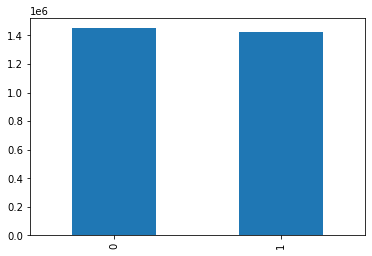

In [71]:
total_data["Change"].value_counts().plot(kind="bar")

In [75]:
total_data.groupby('Change').size().reset_index(name = "Counts")

,Change,Counts
0,0,1449912
1,1,1425976


In [77]:
print(total_data.isnull().values.any())

False


In [9]:
#알파벳과 공백을 제외하고 모두 제거
eng_text = 'do!!! you expect... people~ to~ read~ the FAQ, etc. and actually accept hard~! atheism?@@'
print(re.sub(r'[^a-zA-Z ]', '', eng_text))

do you expect people to read the FAQ etc and actually accept hard atheism


In [10]:
total_data["제목"] = total_data["제목"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")
total_data

/var/folders/7_/2y0m10tj4lgcmdgtsn8_j9yr0000gn/T/ipykernel_3316/143497000.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  total_data["제목"] = total_data["제목"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "")


,언론사,날짜,제목,Change
0,연합뉴스,1998-05-25,한도폐지 첫날 주가 하락세,0
1,연합뉴스,1998-05-25,주가 년만에 최저치로 폭락,0
2,연합뉴스,1998-05-26,주가 급락세 지속 백선도 위협,1
3,연합뉴스,1998-05-26,삼성전자 매출 급신장,1
4,연합뉴스,1998-05-26,엘니뇨 덕 에어컨 일부 품목 품귀현상,1
...,...,...,...,...
2875883,연합뉴스,2022-07-19,춘계승마 어영해 중장애물비월 우승,0
2875884,연합뉴스,2022-07-19,전자업계 컨테이너 운송비용 인상에 반발,0
2875885,연합뉴스,2022-07-19,주식시황 주가 사흘만에 소폭 상승,0
2875886,연합뉴스,2022-07-19,춘계승마 상무 속도장애물비월 단체 우승,0


In [11]:
total_data.tail(50)

,언론사,날짜,제목,Change
2875838,연합뉴스,2022-07-19,주가 백선으로 밀려나,0
2875839,연합뉴스,2022-07-19,삼성전자 인터넷 폰 시스템 개발,0
2875840,연합뉴스,2022-07-19,보험 이용 월드컵마케팅 활발,0
2875841,연합뉴스,2022-07-19,인니 사태로 관련기업 초비상,0
2875842,연합뉴스,2022-07-19,한도 폐지와 단기금융상품 시장 개방 효과,0
2875843,연합뉴스,2022-07-19,주식시황 사흘만에 내림세 반전,0
2875844,연합뉴스,2022-07-19,자본유치단 서 억달러 유치 성공,0
2875845,연합뉴스,2022-07-19,삼성전자 제품 세계 디자인공모전서 호평,0
2875846,연합뉴스,2022-07-19,회전목마 어디가 더 권위있는 기관인가,0
2875847,연합뉴스,2022-07-19,주식시황 반등실패 약보합으로 마감,0


In [12]:
total_data["제목"] = total_data["제목"].str.replace("^ +", "")
total_data["제목"].replace("", np.nan, inplace=True)
total_data.isnull().sum()

/var/folders/7_/2y0m10tj4lgcmdgtsn8_j9yr0000gn/T/ipykernel_3316/3342359428.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  total_data["제목"] = total_data["제목"].str.replace("^ +", "")


언론사         0
날짜          0
제목        481
Change      0
dtype: int64

In [85]:
total_data.loc[total_data["제목"].isnull()]

,언론사,날짜,제목,Change
38999,한국경제,2002-04-29,NaN,1
50269,전자신문,2002-09-27,NaN,0
75177,전자신문,2003-06-19,NaN,0
83235,서울경제,2003-08-28,NaN,0
83326,세계일보,2003-08-28,NaN,0
...,...,...,...,...
2831336,이투데이,2022-05-19,NaN,1
2868572,연합뉴스,2022-07-08,NaN,1
2869356,연합뉴스,2022-07-10,NaN,1
2869357,연합뉴스,2022-07-10,NaN,1


In [13]:
total_data = total_data.dropna(how ="any")
print(len(total_data))

2875407


In [3]:
okt = Okt()
okt.morphs("확대경 박세리 우승에 따른 삼성브랜드 가치 상승효과", stem = True)

['확대경', '박세리', '우승', '에', '따르다', '삼성', '브랜드', '가치', '상승', '효과']

In [88]:
okt.morphs("나는 네가 정말 이럴 줄 몰랐어 네가 이렇게 무능하고 멍청할 걸 알았더라면 기대도 하지 않았을텐데", stem = True)

['나',
 '는',
 '네',
 '가',
 '정말',
 '이렇다',
 '줄',
 '모르다',
 '네',
 '가',
 '이렇게',
 '무능하다',
 '멍청하다',
 '걸',
 '알다',
 '기대다',
 '하다',
 '않다']

In [5]:
okt.morphs("너를 나를 사랑을 구름이 바나나가 물컵이가 바탕으로", stem = True)

['너', '를', '나르다', '사랑', '을', '구름', '이', '바나나', '가', '물컵', '이', '가', '바탕', '으로']

In [7]:
total_data = pd.read_csv("/Users/krc/Desktop/df_golden.csv", index_col=0)

In [15]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다', '로']

In [8]:
total_data

,언론사,날짜,제목,Change
0,연합뉴스,1998-05-25,한도폐지 첫날 주가 하락세,0
1,연합뉴스,1998-05-25,주가 년만에 최저치로 폭락,0
2,연합뉴스,1998-05-26,주가 급락세 지속 백선도 위협,1
3,연합뉴스,1998-05-26,삼성전자 매출 급신장,1
4,연합뉴스,1998-05-26,엘니뇨 덕 에어컨 일부 품목 품귀현상,1
...,...,...,...,...
2875883,연합뉴스,2022-07-19,춘계승마 어영해 중장애물비월 우승,0
2875884,연합뉴스,2022-07-19,전자업계 컨테이너 운송비용 인상에 반발,0
2875885,연합뉴스,2022-07-19,주식시황 주가 사흘만에 소폭 상승,0
2875886,연합뉴스,2022-07-19,춘계승마 상무 속도장애물비월 단체 우승,0


In [9]:
X = []
for sentence in tqdm(total_data["제목"]):
    tokenized_sentence = okt.morphs(sentence, stem = True)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords]
    X.append(stopwords_removed_sentence)

100%|██████████████████████████████| 2875407/2875407 [1:00:37<00:00, 790.49it/s]


In [10]:
X

[['한도', '폐지', '첫날', '주가', '하락', '세'],
 ['주가', '년', '만에', '최저', '치', '폭락'],
 ['주가', '급락', '세', '지속', '백선', '위협'],
 ['삼성', '전자', '매출', '급신', '장'],
 ['엘니뇨', '덕', '에어컨', '일부', '품목', '품귀', '현상'],
 ['폐', '가전제품', '재다', '원화', '시설', '첫', '준공'],
 ['주가', '대', '폭락', '증시', '공황', '우려', '감', '팽배'],
 ['오늘', '주요', '경제', '뉴스', '일'],
 ['삼성', '전자', '한국', '지', '분', '전량', '매각'],
 ['상', '장사', '개중', '개다', '영업', '손해'],
 ['표', '년', '기준', '상위', '사'],
 ['가다', '전사', '동남아', '수출', '차질', '만회', '안간힘'],
 ['반도체', '산업', '민간', '협의', '회', '개최'],
 ['주가', '상승세'],
 ['삼성', '전자', '하나', '더', '판촉', '확대', '실시'],
 ['주식', '시', '황', '주가', '상승', '백선', '회복'],
 ['특집', '체제', '개월', '기업', '구조조정'],
 ['선거', '이후', '과제', '대기업', '그룹', '별', '현안'],
 ['전자', '업계', '수출', '드라이브', '해외', '서', '견제', '심해지다'],
 ['주식', '시', '황주', '사흘', '째', '상승', '백선', '회복'],
 ['삼성', '전자', '급등', '그룹', '차원', '주가', '관리', '가능성'],
 ['정보', '통신업', '계', '실직자', '잡다'],
 ['주가', '하락', '세', '반전'],
 ['삼성', '전자', '세계', '공용', '개발'],
 ['주식', '시', '황', '주가', '일만', '하락', '세', '반전'],
 ['상무부'

In [11]:
len(X)

2875407

In [12]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [13]:
print(tokenizer.word_index)

{'삼성': 1, '전자': 2, '코스피': 3, '갤럭시': 4, '이재용': 5, '일': 6, '선': 7, '시': 8, '반도체': 9, '성': 10, '주': 11, '출시': 12, '년': 13, '기업': 14, '위': 15, '삼': 16, '시장': 17, '마감': 18, '서': 19, '황': 20, '투자': 21, '분기': 22, '등': 23, '장': 24, '상승': 25, '스마트폰': 26, '하락': 27, '실적': 28, '노트': 29, '전': 30, '조': 31, '한국': 32, '월': 33, '외국인': 34, '만원': 35, '대': 36, '기관': 37, '중': 38, '애플': 39, '되다': 40, '만': 41, '기술': 42, '부회장': 43, '보다': 44, '증시': 45, '세계': 46, '억': 47, '최고': 48, '공개': 49, '종합': 50, '회장': 51, '사업': 52, '매수': 53, '국내': 54, '만에': 55, '증권': 56, '대다': 57, '사': 58, '폰': 59, '적': 60, '기': 61, '원': 62, '순': 63, '첫': 64, '글로벌': 65, '최대': 66, '판매': 67, '영업': 68, '포토': 69, '세': 70, '그룹': 71, '개다': 72, '코스닥': 73, '을': 74, '회복': 75, '사장': 76, '까지': 77, '주가': 78, '제': 79, '화': 80, '없다': 81, '종목': 82, '스마트': 83, '명': 84, '에서': 85, '형': 86, '수': 87, '지': 88, '상': 89, '오늘': 90, '매도': 91, '돌파': 92, '경제': 93, '이건희': 94, '하이닉스': 95, '산업': 96, '개': 97, '올해': 98, '신': 99, '확대': 100, '가전': 101, '아이폰': 102, '외인': 1

In [14]:
len(tokenizer.word_index)

86706

In [15]:
threshold = 3
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq += value
    
    if value < threshold:
        rare_cnt += 1
        rare_freq += value
        
print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 86706
등장 빈도가 2번 이하인 희귀 단어의 수: 36377
단어 집합에서 희귀 단어의 비율: 41.95442068599636
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 0.18808406889460674


In [16]:
vocab_size = total_cnt - rare_cnt + 1
print("단어 집합의 크기: ", vocab_size)

단어 집합의 크기:  50330


In [83]:
X

array([[    0,     0,     0, ...,    78,    27,    70],
       [    0,     0,     0, ...,   676,   367,   998],
       [    0,     0,     0, ...,   212,  6972,  1144],
       ...,
       [    0,     0,     0, ...,   188,   196,    25],
       [    0,     0,     0, ..., 23185,  1328,  1492],
       [    0,     0,     0, ..., 30578,  1525,   106]], dtype=int32)

In [17]:
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X)
X = tokenizer.texts_to_sequences(X)

In [86]:
tokenizer.texts_to_sequences(new_sentence)

[[16], [10], [2], [114], [], [1145], [5862], [1683], [3049], [], [138], [287]]

In [18]:
print(X[:3])

[[4265, 2210, 936, 78, 27, 70], [78, 13, 55, 676, 367, 998], [78, 213, 70, 212, 6972, 1144]]


In [19]:
y = np.array(total_data["Change"])
y

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
len(y)

2875407

In [21]:
drop_index = [index for index, sentence in enumerate(X) if len(sentence) < 1]

In [22]:
X = np.delete(X, drop_index, axis = 0)
y = np.delete(y, drop_index, axis = 0)
print(len(X))
print(len(y))

2875393
2875393


/Users/krc/miniforge3/envs/tf/lib/python3.8/site-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


제목의 최대 길이 : 23
제목의 평균 길이 : 8.381338133604693


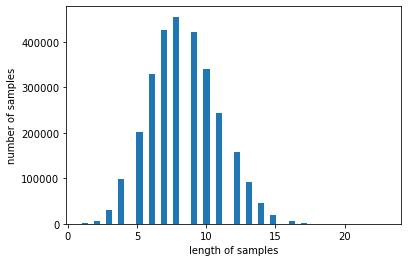

In [23]:
print('제목의 최대 길이 :',max(len(review) for review in X))
print('제목의 평균 길이 :',sum(map(len, X))/len(X))
plt.hist([len(review) for review in X], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [24]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [25]:
below_threshold_len(15, X)

전체 샘플 중 길이가 15 이하인 샘플의 비율: 99.72198582941532


In [26]:
X = pad_sequences(X, maxlen=15)

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(X, test_size=0.3, random_state=0)

In [28]:
len(X_train), len(X_test)

(2012775, 862618)

In [29]:
len(X_train) + len(X_test)

2875393

In [30]:
len(y)

2875393

In [31]:
y_train, y_test = train_test_split(y, test_size=0.3, random_state=0)

In [32]:
len(y_train), len(y_test)

(2012775, 862618)

### train_test_split 함수 익히는 중 아래 코드 전부 다!

In [148]:
split_test1 = np.array(range(200))
split_test2 = np.array(range(200))

In [149]:
st_train1, st_test1 = train_test_split(split_test1, test_size=0.3, random_state=0)

In [150]:
st_train1

array([131,  96, 181,  19, 153,  92,  54, 163,  51,  86, 139,  90, 137,
       101, 144,  89, 109,  14,  27, 141, 187,  46, 138, 195, 108,  62,
         2,  59, 136, 197,  43,  10, 194,  73, 196, 178, 175, 126,  93,
       112, 158, 191,  50,   0,  94, 110,  95,  64, 167,  41,  69,  49,
        48,  85,  13, 161,  23, 186, 135,  20,  15,  78, 104,  52, 100,
        76,   3, 116, 164, 198,   6,  68,  84, 121, 155, 171, 156,  91,
       199,  11, 119, 102,  35,  57,  65,   1, 120, 162,  42, 105, 132,
       173,  17,  38, 133,  53, 157, 128,  34,  28, 114, 151,  31, 166,
       127, 176,  32, 142, 169, 147,  29,  99,  82,  79, 115, 148, 193,
        72,  77,  25, 165,  81, 188, 174, 190,  39,  58, 140,  88,  70,
        87,  36,  21,   9, 103,  67, 192, 117,  47, 172])

In [151]:
st_test1

array([ 18, 170, 107,  98, 177, 182,   5, 146,  12, 152,  61, 125, 180,
       154,  80,   7,  33, 130,  37,  74, 183, 145,  45, 159,  60, 123,
       179, 185, 122,  44,  16,  55, 150, 111,  22, 189, 129,   4,  83,
       106, 134,  66,  26, 113, 168,  63,   8,  75, 118, 143,  71, 124,
       184,  97, 149,  24,  30, 160,  40,  56])

In [152]:
st_train2, st_test2 = train_test_split(split_test2, test_size=0.3, random_state=0)

In [153]:
st_train2

array([131,  96, 181,  19, 153,  92,  54, 163,  51,  86, 139,  90, 137,
       101, 144,  89, 109,  14,  27, 141, 187,  46, 138, 195, 108,  62,
         2,  59, 136, 197,  43,  10, 194,  73, 196, 178, 175, 126,  93,
       112, 158, 191,  50,   0,  94, 110,  95,  64, 167,  41,  69,  49,
        48,  85,  13, 161,  23, 186, 135,  20,  15,  78, 104,  52, 100,
        76,   3, 116, 164, 198,   6,  68,  84, 121, 155, 171, 156,  91,
       199,  11, 119, 102,  35,  57,  65,   1, 120, 162,  42, 105, 132,
       173,  17,  38, 133,  53, 157, 128,  34,  28, 114, 151,  31, 166,
       127, 176,  32, 142, 169, 147,  29,  99,  82,  79, 115, 148, 193,
        72,  77,  25, 165,  81, 188, 174, 190,  39,  58, 140,  88,  70,
        87,  36,  21,   9, 103,  67, 192, 117,  47, 172])

In [154]:
st_test2

array([ 18, 170, 107,  98, 177, 182,   5, 146,  12, 152,  61, 125, 180,
       154,  80,   7,  33, 130,  37,  74, 183, 145,  45, 159,  60, 123,
       179, 185, 122,  44,  16,  55, 150, 111,  22, 189, 129,   4,  83,
       106, 134,  66,  26, 113, 168,  63,   8,  75, 118, 143,  71, 124,
       184,  97, 149,  24,  30, 160,  40,  56])

## 다 익힘!

In [54]:
type(X_train)

numpy.ndarray

In [42]:
X_train

array([[    0,     0,     0, ...,   801,   219,   574],
       [    0,     0,     0, ...,  5228,   549,   177],
       [    0,     0,     0, ...,    95,    57,    27],
       ...,
       [    0,     0,     0, ...,   227,   204,   419],
       [    0,     0,     0, ...,   364,  1801, 10313],
       [    0,     0,     0, ...,     2,    39,   138]], dtype=int32)

In [71]:
# 이걸 X_train 에 저장하면 됨
np.array(temp, dtype=np.int32)

array([[    0,     0,     0, ...,   801,   219,   574],
       [    0,     0,     0, ...,  5228,   549,   177],
       [    0,     0,     0, ...,    95,    57,    27],
       ...,
       [    0,     0,     0, ...,   227,   204,   419],
       [    0,     0,     0, ...,   364,  1801, 10313],
       [    0,     0,     0, ...,     2,    39,   138]], dtype=int32)

In [68]:
temp

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 453, 31787, 8114, 801, 219, 574],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 576, 120, 103, 5228, 549, 177],
 [0, 0, 0, 0, 0, 0, 113, 11, 36, 1924, 16, 30, 95, 57, 27],
 [0, 0, 0, 0, 1, 2, 163, 470, 1156, 258, 3215, 295, 533, 837, 657],
 [0, 0, 0, 0, 0, 0, 0, 1, 2, 107, 1844, 13, 86, 54, 12],
 [0, 0, 0, 0, 0, 0, 0, 37, 73, 8438, 91, 4852, 2897, 928, 2774],
 [0, 0, 0, 0, 0, 0, 1480, 1, 2, 379, 2531, 864, 142, 42, 49],
 [0, 0, 0, 0, 0, 642, 126, 50, 9, 1955, 805, 13, 524, 46, 15],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 37, 252, 25, 18],
 [1019,
  128,
  2269,
  4525,
  38,
  84,
  11252,
  147,
  544,
  628,
  35114,
  4702,
  19,
  6157,
  858],
 [0, 0, 0, 11942, 739, 16, 10, 30, 4098, 1304, 205, 9, 127, 526, 140],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 98, 135, 97, 390, 346],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 6370, 36, 58, 20534, 4535, 971],
 [0, 0, 0, 0, 0, 0, 0, 0, 280, 22345, 623, 38327, 382, 328, 38],
 [0, 0, 0, 0, 0, 0, 1, 358, 766, 594, 3906, 2717, 43, 2594, 2203],
 [0, 0, 0, 0, 0

In [72]:
pd.DataFrame(X_train).to_csv("X_train.csv")
pd.DataFrame(X_test).to_csv("X_test.csv")
pd.DataFrame(y_train).to_csv("y_train.csv")
pd.DataFrame(y_test).to_csv("y_test.csv")

In [48]:
test_X_train = pd.read_csv("test_X_train.csv", index_col=0)

In [50]:
temp = []

In [51]:
for i in range(len(test_X_train)):
    temp.append([x for x in test_X_train.loc[i].tolist()])

In [62]:
temp

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 453, 31787, 8114, 801, 219, 574],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 576, 120, 103, 5228, 549, 177],
 [0, 0, 0, 0, 0, 0, 113, 11, 36, 1924, 16, 30, 95, 57, 27],
 [0, 0, 0, 0, 1, 2, 163, 470, 1156, 258, 3215, 295, 533, 837, 657],
 [0, 0, 0, 0, 0, 0, 0, 1, 2, 107, 1844, 13, 86, 54, 12],
 [0, 0, 0, 0, 0, 0, 0, 37, 73, 8438, 91, 4852, 2897, 928, 2774],
 [0, 0, 0, 0, 0, 0, 1480, 1, 2, 379, 2531, 864, 142, 42, 49],
 [0, 0, 0, 0, 0, 642, 126, 50, 9, 1955, 805, 13, 524, 46, 15],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 37, 252, 25, 18],
 [1019,
  128,
  2269,
  4525,
  38,
  84,
  11252,
  147,
  544,
  628,
  35114,
  4702,
  19,
  6157,
  858],
 [0, 0, 0, 11942, 739, 16, 10, 30, 4098, 1304, 205, 9, 127, 526, 140],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 98, 135, 97, 390, 346],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 6370, 36, 58, 20534, 4535, 971],
 [0, 0, 0, 0, 0, 0, 0, 0, 280, 22345, 623, 38327, 382, 328, 38],
 [0, 0, 0, 0, 0, 0, 1, 358, 766, 594, 3906, 2717, 43, 2594, 2203],
 [0, 0, 0, 0, 0

In [61]:
np.array(test_X_train.loc[0])

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
         453, 31787,  8114,   801,   219,   574])

AttributeError: 'list' object has no attribute 'array'

In [41]:
X_train.to_csv("test_X_train.csv")

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [73]:
X_train, X_test, y_train, y_test

(array([[    0,     0,     0, ...,   801,   219,   574],
        [    0,     0,     0, ...,  5228,   549,   177],
        [    0,     0,     0, ...,    95,    57,    27],
        ...,
        [    0,     0,     0, ...,   227,   204,   419],
        [    0,     0,     0, ...,   364,  1801, 10313],
        [    0,     0,     0, ...,     2,    39,   138]], dtype=int32),
 array([[    0,     0,     0, ...,   671,   251,    38],
        [    0,     0,    50, ...,  2671,     9,   938],
        [    0,     0,     0, ...,  2432,   757,  1281],
        ...,
        [    0,     0,     0, ...,   640,   309,  4824],
        [    0,     0,     0, ..., 11835, 12355,   148],
        [    0,     0,     0, ...,     2,  1065,   180]], dtype=int32),
 array([0, 1, 1, ..., 1, 0, 0]),
 array([1, 0, 1, ..., 1, 0, 1]))

In [5]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [165]:
vocab_size

50331

In [94]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

In [166]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_adam.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

2022-08-03 18:17:06.030868: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/15
25157/25160 [============================>.] - ETA: 0s - loss: 0.6856 - acc: 0.5381
Epoch 00001: val_acc improved from -inf to 0.55300, saving model to best_model.h5
25160/25160 [==============================] - 418s 17ms/step - loss: 0.6856 - acc: 0.5381 - val_loss: 0.6799 - val_acc: 0.5530
Epoch 2/15
25160/25160 [==============================] - ETA: 0s - loss: 0.6711 - acc: 0.5736
Epoch 00002: val_acc improved from 0.55300 to 0.56024, saving model to best_model.h5
25160/25160 [==============================] - 412s 16ms/step - loss: 0.6711 - acc: 0.5736 - val_loss: 0.6744 - val_acc: 0.5602
Epoch 3/15
25160/25160 [==============================] - ETA: 0s - loss: 0.6611 - acc: 0.5887
Epoch 00003: val_acc improved from 0.56024 to 0.56297, saving model to best_model.h5
25160/25160 [==============================] - 411s 16ms/step - loss: 0.6611 - acc: 0.5887 - val_loss: 0.6715 - val_acc: 0.5630
Epoch 4/15
25159/25160 [============================>.] - ETA: 0s - loss: 0.651

In [167]:
loaded_model = load_model("best_model.h5")
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

26957/26957 [==============================] - 75s 3ms/step - loss: 0.6761 - acc: 0.5761

 테스트 정확도: 0.5761


In [95]:
embedding_dim = 100
hidden_units = 128

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim))
model.add(LSTM(hidden_units))
model.add(Dense(1, activation='sigmoid'))

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model_adam.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=64, validation_split=0.2)

Epoch 1/15


2022-08-04 19:00:27.725650: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


25159/25160 [============================>.] - ETA: 0s - loss: 0.6788 - acc: 0.5445
Epoch 1: val_acc improved from -inf to 0.55981, saving model to best_model_adam.h5
25160/25160 [==============================] - 668s 27ms/step - loss: 0.6788 - acc: 0.5445 - val_loss: 0.6693 - val_acc: 0.5598
Epoch 2/15
25159/25160 [============================>.] - ETA: 0s - loss: 0.6532 - acc: 0.5863
Epoch 2: val_acc improved from 0.55981 to 0.57041, saving model to best_model_adam.h5
25160/25160 [==============================] - 660s 26ms/step - loss: 0.6532 - acc: 0.5863 - val_loss: 0.6624 - val_acc: 0.5704
Epoch 3/15
25159/25160 [============================>.] - ETA: 0s - loss: 0.6278 - acc: 0.6185
Epoch 3: val_acc improved from 0.57041 to 0.57544, saving model to best_model_adam.h5
25160/25160 [==============================] - 668s 27ms/step - loss: 0.6278 - acc: 0.6185 - val_loss: 0.6633 - val_acc: 0.5754
Epoch 4/15
25160/25160 [==============================] - ETA: 0s - loss: 0.5999 - acc:

# 여길 봐 테스트 결과야! LSTM_adam

In [8]:
loaded_model = load_model("best_model_adam.h5")

In [7]:
loaded_model = load_model("best_model_adam.h5")
print("\n 테스트 정확도: %.4f" % (loaded_model.evaluate(X_test, y_test)[1]))

NameError: name 'X_test' is not defined

# 여길 봐 테스트 결과야!  LSTM_adam

In [9]:
def stock_up_down_predict(new_sentence):
    new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]', "", new_sentence)
    new_sentecne = okt.morphs(new_sentence, stem=True)
    new_sentecne = [word for word in new_sentence if not word in stopwords]
    encoded = tokenizer.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen = 15)
    score = float(loaded_model.predict(pad_new))
    if score > 0.5:
        print("{:.2f}% 확률로 업!\n".format(score*100))
    else:
        print("{:.2f}% 확률로 다운!\n".format(score*100))

In [10]:
today_headlines = ["삼성전자, '플래시 메모리 서밋'서 차세대 메모리 솔루션 공개", "'갤럭시워치'로 의학 연구까지?…삼성전자 \"프로젝트 조만간 공개\"", "\"삼성전자 비중 확대\"…한국운용, 삼성그룹펀드 전략 재편", "\"빅데이터 시대 이끈다\"…삼성전자, 차세대 메모리 솔루션 대거 공개", "삼성전자, 차세대 메모리 대거 공개…20배 빠른 SSD", "로봇주, 삼성전자 '무인공장' 도입 보도에 일제히 상승", "삼성·LG전자, 대한민국 올해 녹색상품 대거 수상", "삼성전자 '올해의 녹색상품' 의료기기 포함 11개 제품 수상", "삼성전자, 일자리 시장서 빛났다…올 상반기 순고용 증가 '1위'"]

In [26]:
today_headlines = []
for _ in range(10):
    today_headlines.append(input())

연세대 의대 졸업→복지부 공보의→삼성전자
오전증시 상승유지…'제약·2차 전지' 투심 집중
"이번엔 다를까"…번번이 '특사' 실패한 이재용, 긍정 여론 속 삼성 '침묵'
삼성 언팩 D-5…Z폴드4·플립4 물들여 '보라'
경제단체, 이재용·신동빈 광복절 특별사면 건의 추진
[ET시선]미룰 수 없는 이재용 부회장 사면
델리오, 웹3.0 디지털자산 지갑 자체 개발
페이 포인트에 명품까지···이통3사, 신작 갤럭시 사전알람 혜택 경쟁
페이 포인트에 명품까지···이통3사, 신작 갤럭시 사전알람 혜택 경쟁
삼성·LG전자 앞다퉈…가전, 예술을 입다


In [28]:
today_headlines1 = []
for _ in range(10):
    today_headlines1.append(input())

연세대 의대 졸업→복지부 공보의→삼성전자
오전증시 상승유지…'제약·2차 전지' 투심 집중
"이번엔 다를까"…번번이 '특사' 실패한 이재용, 긍정 여론 속 삼성 '침묵'
삼성 언팩 D-5…Z폴드4·플립4 물들여 '보라'
경제단체, 이재용·신동빈 광복절 특별사면 건의 추진
[ET시선]미룰 수 없는 이재용 부회장 사면
델리오, 웹3.0 디지털자산 지갑 자체 개발
페이 포인트에 명품까지···이통3사, 신작 갤럭시 사전알람 혜택 경쟁
KB증권, 8월 첫째주 삼성SDI 등 8종목 매수 추천
삼성·LG전자 앞다퉈…가전, 예술을 입다


In [8]:
stock_up_down_predict("사랑")

입력받음: 사랑


NameError: name 'stopwords' is not defined

In [29]:
for i in today_headlines1:
    stock_up_down_predict(i)

입력받음: 연세대 의대 졸업→복지부 공보의→삼성전자
1/1 [==============================] - 0s 12ms/step
스코어: 0.10513593256473541
10.51% 확률로 다운!

입력받음: 오전증시 상승유지…'제약·2차 전지' 투심 집중
1/1 [==============================] - 0s 9ms/step
스코어: 0.5324455499649048
53.24% 확률로 업!

입력받음: "이번엔 다를까"…번번이 '특사' 실패한 이재용, 긍정 여론 속 삼성 '침묵'
1/1 [==============================] - 0s 7ms/step
스코어: 0.7604286074638367
76.04% 확률로 업!

입력받음: 삼성 언팩 D-5…Z폴드4·플립4 물들여 '보라'
1/1 [==============================] - 0s 7ms/step
스코어: 0.2690897285938263
26.91% 확률로 다운!

입력받음: 경제단체, 이재용·신동빈 광복절 특별사면 건의 추진
1/1 [==============================] - 0s 7ms/step
스코어: 0.8565108776092529
85.65% 확률로 업!

입력받음: [ET시선]미룰 수 없는 이재용 부회장 사면
1/1 [==============================] - 0s 7ms/step
스코어: 0.26184916496276855
26.18% 확률로 다운!

입력받음: 델리오, 웹3.0 디지털자산 지갑 자체 개발
1/1 [==============================] - 0s 7ms/step
스코어: 0.5114665031433105
51.15% 확률로 업!

입력받음: 페이 포인트에 명품까지···이통3사, 신작 갤럭시 사전알람 혜택 경쟁
1/1 [==============================] - 0s 7ms/step
스코어: 0.7050145864486694
7

In [ ]:
로이터통신 icon 
증권사 프로그램 사례 찾기

In [75]:
len(total_data)

2875407

In [77]:
partition = len(total_data)//4

In [78]:
total_data_1 = total_data[partition*0:partition*1]
total_data_2 = total_data[partition*1:partition*2]
total_data_3 = total_data[partition*2:partition*3]
total_data_4 = total_data[partition*3:partition*4]
total_data_5 = total_data[partition*4:]

In [79]:
total_data_5

,언론사,날짜,제목,Change
2875885,연합뉴스,2022-07-19,주식시황 주가 사흘만에 소폭 상승,0
2875886,연합뉴스,2022-07-19,춘계승마 상무 속도장애물비월 단체 우승,0
2875887,연합뉴스,2022-07-19,일 투자한도 완전철폐 천억천억원 유입 전망,0


In [80]:
test_txt = "삼성전자, 인도 통신사업자 에어텔에 5G 공급 계약"

In [82]:
test_txt = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]', "", test_txt)

In [85]:
new_sentence = okt.morphs(test_txt, stem=True)

In [14]:
print(tokenizer.word_index)

{'삼성': 1, '전자': 2, '코스피': 3, '갤럭시': 4, '이재용': 5, '일': 6, '선': 7, '시': 8, '반도체': 9, '성': 10, '주': 11, '출시': 12, '년': 13, '기업': 14, '위': 15, '삼': 16, '시장': 17, '마감': 18, '서': 19, '황': 20, '투자': 21, '분기': 22, '등': 23, '장': 24, '상승': 25, '스마트폰': 26, '하락': 27, '실적': 28, '노트': 29, '전': 30, '조': 31, '한국': 32, '월': 33, '외국인': 34, '만원': 35, '대': 36, '기관': 37, '중': 38, '애플': 39, '되다': 40, '만': 41, '기술': 42, '부회장': 43, '보다': 44, '증시': 45, '세계': 46, '억': 47, '최고': 48, '공개': 49, '종합': 50, '회장': 51, '사업': 52, '매수': 53, '국내': 54, '만에': 55, '증권': 56, '대다': 57, '사': 58, '폰': 59, '적': 60, '기': 61, '원': 62, '순': 63, '첫': 64, '글로벌': 65, '최대': 66, '판매': 67, '영업': 68, '포토': 69, '세': 70, '그룹': 71, '개다': 72, '코스닥': 73, '을': 74, '회복': 75, '사장': 76, '까지': 77, '주가': 78, '제': 79, '화': 80, '없다': 81, '종목': 82, '스마트': 83, '명': 84, '에서': 85, '형': 86, '수': 87, '지': 88, '상': 89, '오늘': 90, '매도': 91, '돌파': 92, '경제': 93, '이건희': 94, '하이닉스': 95, '산업': 96, '개': 97, '올해': 98, '신': 99, '확대': 100, '가전': 101, '아이폰': 102, '외인': 1

In [4]:
import pickle

In [89]:
# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [5]:
# loading
with open('tokenizer.pickle', 'rb') as handle:
    tokenizer = pickle.load(handle)

In [7]:
def stock_up_down_predict(new_sentence):
  print("입력받음:", new_sentence)
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]', "", new_sentence)
#   print("한글만:", new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True)
#   print("형태소 정제:", new_sentence)
#   print()
  new_sentence = [word for word in new_sentence if not word in stopwords]
#   print("불용어 제거:", new_sentence)
#   print()
  encoded = tokenizer.texts_to_sequences([new_sentence])
#   print("숫자로:", encoded)
#   print()
  pad_new = pad_sequences(encoded, maxlen = 15)
#   print("패들링:", pad_new)
  score = float(loaded_model.predict(pad_new))
  print("스코어:", score)
  if score > 0.5:
      print("{:.2f}% 확률로 업!\n".format(score*100))
  else:
      print("{:.2f}% 확률로 다운!\n".format(score*100))

In [30]:
10.51+53.24+76.04+26.91+85.65+26.18+51.15+70.50+52.90+34.61

487.69

In [31]:
487.69//10

48.0